In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm



Read CSV building_117_roof_01_door01_modified.csv

In [2]:
#Reading CSV File, Building_01, which is actually building_0000 
#df = pd.read_csv('117_variedroof_Door.csv', sep = '\t').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#, header=0, names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df = pd.read_csv('building_117_roof_01_door01_modified.csv').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1) 
#df1 = df.dropna() 
#df2 = df1.values
df.info()
print(df.shape)
#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 12000, random_state=123)
#df_minority_downsampled = resample(df_minority, replace = False, n_samples = 10000, random_state=123)
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 12000, random_state=123)
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

#display class counts 
df_downsampled.Type.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  float64
 1   Y                  17877 non-null  float64
 2   Z                  17877 non-null  float64
 3   Scan_Angle_Rank    17877 non-null  int64  
 4   Flightline_Edge    17877 non-null  int64  
 5   Scan_Direction     17877 non-null  int64  
 6   Number_of_Returns  17877 non-null  int64  
 7   Return_Number      17877 non-null  int64  
 8   Time               17877 non-null  float64
 9   Intensity          17877 non-null  int64  
 10  Classification     17877 non-null  int64  
 11  Type               17877 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.6+ MB
(17877, 12)


roof    12000
door    12000
Name: Type, dtype: int64

Apply downsampled column to new dataset 

In [3]:
#with downsampling, and normalization
xOld = df_downsampled.drop('Type', axis = 1)
#print(x)
y = df_downsampled.Type
#print(y)
#print(x.shape,y.shape)
#print(y.shape)

scaler = preprocessing.StandardScaler().fit(xOld)
scaler.mean_
scaler.scale_
x = scaler.transform(xOld)

x.mean(axis = 0)
x.std(axis=0)

#print(x.shape)

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

Train/Test Split

In [4]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#print(x_train)
#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)

(18000, 11) (6000, 11)


Read CSV #2 - building_02_roof_doors.csv

In [5]:
#Reading CSV File #2, Building_0000001 txt 
df_a =  pd.read_csv('building_02_roof_doors.csv',sep = ',').drop("R",axis=1).drop("G",axis=1).drop("B",axis=1).drop("Point_Source_ID",axis=1)#,header = 0,names = ['X','Y','Z','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
#print(df_a)
df_a.info()
#print(df_a['Z'])
'''
#Reading CSV File #2, Building_0000001 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58375 entries, 0 to 58374
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  58375 non-null  float64
 1   Y                  58375 non-null  float64
 2   Z                  58375 non-null  float64
 3   Scan_Angle_Rank    58375 non-null  int64  
 4   Flightline_Edge    58375 non-null  int64  
 5   Scan_Direction     58375 non-null  int64  
 6   Number_of_Returns  58375 non-null  int64  
 7   Return_Number      58375 non-null  int64  
 8   Time               58375 non-null  float64
 9   Intensity          58375 non-null  int64  
 10  Classification     58375 non-null  int64  
 11  Type               58375 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 5.3+ MB


"\n#Reading CSV File #2, Building_0000001 txt \ndf_b = pd.read_csv('Buildings_000002.txt',sep = ' ')\ndf_b1 = df_b.dropna() \ndf_b2 = df_b1.values\n"

In [6]:
#Normalizing two other data sets
#For building 000001
x1Old = df_a2[:, :11] 
y1 = df_a2[:, 11] 

scaler = preprocessing.StandardScaler().fit(x1Old)
x1 = scaler.transform(x1Old)

print(x1)
'''
#For building 000002
x2Old = df_b2[:, :14] 
y2 = df_b2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x2Old)
x2 = scaler.transform(x2Old)
'''

[[-2.29988919e+00  2.63257620e-01 -2.03847012e-01 ... -1.07808091e+00
  -8.41637894e-01  3.28163880e+00]
 [-2.27777570e+00  2.87706151e-01 -2.39301338e-01 ... -1.07808082e+00
   2.11969757e-03  3.28163880e+00]
 [-2.25080128e+00  3.17993136e-01 -2.30109336e-01 ... -1.07808082e+00
  -8.29837088e-01  3.28163880e+00]
 ...
 [ 1.73844148e+00  5.29637128e-01 -7.59621694e+00 ...  1.39740724e+00
  -9.68110790e-03  3.28163880e+00]
 [ 1.49942441e+00  8.51247376e-01 -6.97641090e+00 ...  1.64341388e+00
  -1.01274957e+00  3.28163880e+00]
 [ 1.49791324e+00  8.63471641e-01 -6.62317383e+00 ...  1.64341388e+00
  -9.77347157e-01  3.28163880e+00]]


'\n#For building 000002\nx2Old = df_b2[:, :14] \ny2 = df_b2[:, 14] \n\nscaler = preprocessing.StandardScaler().fit(x2Old)\nx2 = scaler.transform(x2Old)\n'

Linear/Poly/RBF/Sigmoid Kernel 

In [7]:

#SVM - LINEAR 
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []
acc_test_svm_linear = []
#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)

    yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test_linear = np.mean(yhat_svc_linear_test == y_test)
    acc_test_svm_linear.append(acc_test_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_test_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_linear_building_000001_SVM = svc_linear.predict(x1)
    acc_linear_building_000001_SVM = np.mean(yhat_linear_building_000001_SVM == y1)
    print("Linear (other building):",acc_linear_building_000001_SVM)
#print("Train Accuracy: ",acc_train_linear)


Train Accuracy using a Linear kernel
Train Accuracy(c=0.01): 1.0
Train Accuracy(c=0.01): 1.0
Linear (other building): 0.6869892933618844
Train Accuracy(c=0.1): 1.0
Train Accuracy(c=0.1): 1.0
Linear (other building): 0.6908094218415417
Train Accuracy(c=1): 1.0
Train Accuracy(c=1): 1.0
Linear (other building): 0.6863554603854389
Train Accuracy(c=10): 1.0
Train Accuracy(c=10): 1.0
Linear (other building): 0.6863554603854389
Train Accuracy(c=100): 1.0
Train Accuracy(c=100): 1.0
Linear (other building): 0.6863554603854389


In [8]:
#SVM - POLYNOMIAL
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_poly = []
acc_test_svm_poly = []
#train
print("Train Accuracy using a Poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy (c=",c,"): ", acc_test_poly)

    yhat_poly_building_000001_SVM = svc_poly.predict(x1)
    acc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)
    print("POLY (other building):",acc_poly_building_000001_SVM)

    '''
    yhat_poly_building_000002_SVM = svc_poly.predict(x2)
    acc_poly_building_000002_SVM = np.mean(yhat_poly_building_000002_SVM == y2)
    print("POLY (other building):",acc_poly_building_000002_SVM)
    '''

#print("Train Accuracy: ",acc_train_linear)

Train Accuracy using a Poly kernel
Train Accuracy(c=0.01): 1.0
Test Accuracy (c= 0.01 ):  1.0
POLY (other building): 0.7196573875802997
Train Accuracy(c=0.1): 1.0
Test Accuracy (c= 0.1 ):  1.0
POLY (other building): 0.8209336188436831
Train Accuracy(c=1): 1.0
Test Accuracy (c= 1 ):  1.0
POLY (other building): 0.8454475374732334
Train Accuracy(c=10): 1.0
Test Accuracy (c= 10 ):  1.0
POLY (other building): 0.8526423982869379
Train Accuracy(c=100): 1.0
Test Accuracy (c= 100 ):  1.0
POLY (other building): 0.8526252676659529


In [9]:
#SVM - RBF
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_rbf = []
acc_test_svm_rbf = []
#train
print("RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy (c=",c,"): ", acc_test_rbf)

    yhat_rbf_building_000001_SVM = svc_rbf.predict(x1)
    acc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)
    print("RBF (other building):",acc_rbf_building_000001_SVM)

    '''
    yhat_rbf_building_000002_SVM = svc_rbf.predict(x2)
    acc_rbf_building_000002_SVM = np.mean(yhat_rbf_building_000002_SVM == y2)
    print("RBF (other building):",acc_rbf_building_000002_SVM)
    '''
#print("Train Accuracy: ",acc_train_linear)


RBF kernel
Train Accuracy(c=0.01): 1.0
Test Accuracy (c= 0.01 ):  1.0
RBF (other building): 0.7321456102783725
Train Accuracy(c=0.1): 1.0
Test Accuracy (c= 0.1 ):  1.0
RBF (other building): 0.7653104925053533
Train Accuracy(c=1): 1.0
Test Accuracy (c= 1 ):  1.0
RBF (other building): 0.7733276231263383
Train Accuracy(c=10): 1.0
Test Accuracy (c= 10 ):  1.0
RBF (other building): 0.7733276231263383
Train Accuracy(c=100): 1.0
Test Accuracy (c= 100 ):  1.0
RBF (other building): 0.7733276231263383


In [10]:

#SVM - SIGMOID
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_sigmoid = []
acc_test_svm_sigmoid = []
acc_other_svm_sigmoid = []
#train
print(" SIGMOID kernel")
for c in cVals: 
    svc_sigmoid = svm.SVC(probability = False, kernel = 'sigmoid', C = c)
    svc_sigmoid.fit(x_train, y_train)

    yhat_svc_sigmoid_train = svc_sigmoid.predict(x_train)
    acc_train_sigmoid = np.mean(yhat_svc_sigmoid_train == y_train)
    acc_train_svm_sigmoid.append(acc_train_sigmoid)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_sigmoid)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_sigmoid_test = svc_sigmoid.predict(x_test)
    acc_test_sigmoid = np.mean(yhat_svc_sigmoid_test == y_test)
    acc_test_svm_sigmoid.append(acc_test_sigmoid)
    print("Test Accuracy (c=",c,"): ", acc_test_sigmoid)

    yhat_svc_sigmoid_other = svc_sigmoid.predict(x1)
    acc_other_sigmoid = np.mean(yhat_svc_sigmoid_other == y1)
    acc_other_svm_sigmoid.append(acc_other_sigmoid)
    print("Other building:",acc_other_sigmoid)
    
#print("Train Accuracy: ",acc_train_linear)




 SIGMOID kernel
Train Accuracy(c=0.01): 0.9975555555555555
Test Accuracy (c= 0.01 ):  0.9978333333333333
Other building: 0.5332419700214133
Train Accuracy(c=0.1): 0.9983333333333333
Test Accuracy (c= 0.1 ):  0.9991666666666666
Other building: 0.6004625267665953
Train Accuracy(c=1): 0.9983333333333333
Test Accuracy (c= 1 ):  0.9991666666666666
Other building: 0.6803254817987152
Train Accuracy(c=10): 0.9988888888888889
Test Accuracy (c= 10 ):  0.9983333333333333
Other building: 0.7739100642398287
Train Accuracy(c=100): 0.9988888888888889
Test Accuracy (c= 100 ):  0.9983333333333333
Other building: 0.7734989293361885


Confusion Matrices

Confusion matrix, without normalization
[[  739     0]
 [ 9022 48614]]
Normalized confusion matrix
[[1.   0.  ]
 [0.16 0.84]]


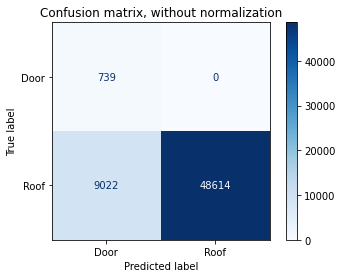

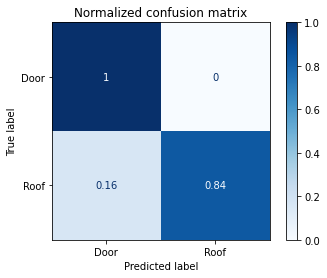

In [14]:
#Confusion Matrix for SVM Poly for train set of Data 

np.set_printoptions(precision=2)
class_names = ['Door','Roof']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Confusion matrix, without normalization
[[2936    0]
 [   0 3064]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


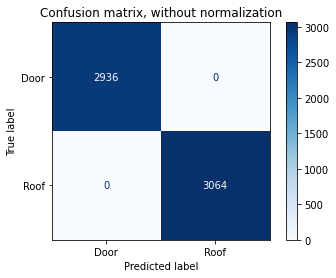

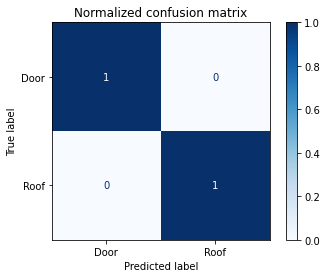

In [12]:
np.set_printoptions(precision=2)
class_names = ['Door','Roof']
classifier = svm.SVC(probability = False, kernel = 'linear', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>